# Installing The Libraries

In [37]:
#Import Libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pylab as py
sns.set()

#Modelling Libraries
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Load Dataset

In [2]:
#Import Dataset
df = pd.read_csv ('/content/Dataset9_Diabetes_Prediction.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Data Preprocessing

##Missing Values

In [3]:
 df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It can be seen that there are missing values marked '0'. Therefore, it must be replaced with a NaN value before starting the imputation process

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#Show NaN Values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Next is to replace the 0 values with NaN Values so that the imputation process can be carried out by adding the median value for each column.

In [5]:
#Computing Median Values
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

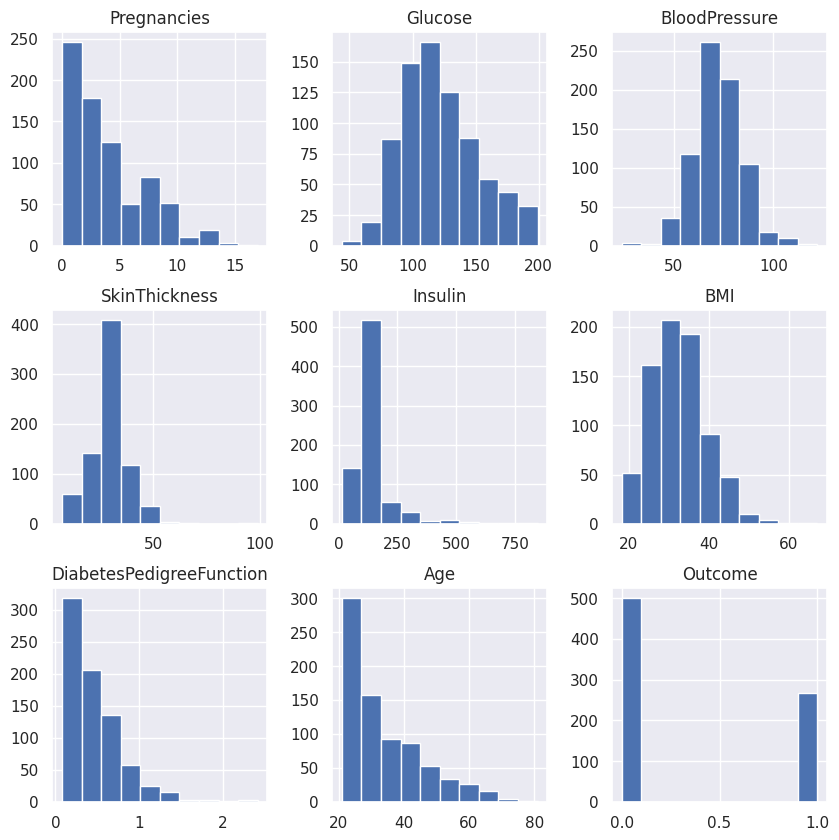

In [6]:
#Plotting The Distribution

p = df.hist(figsize = (10,10))

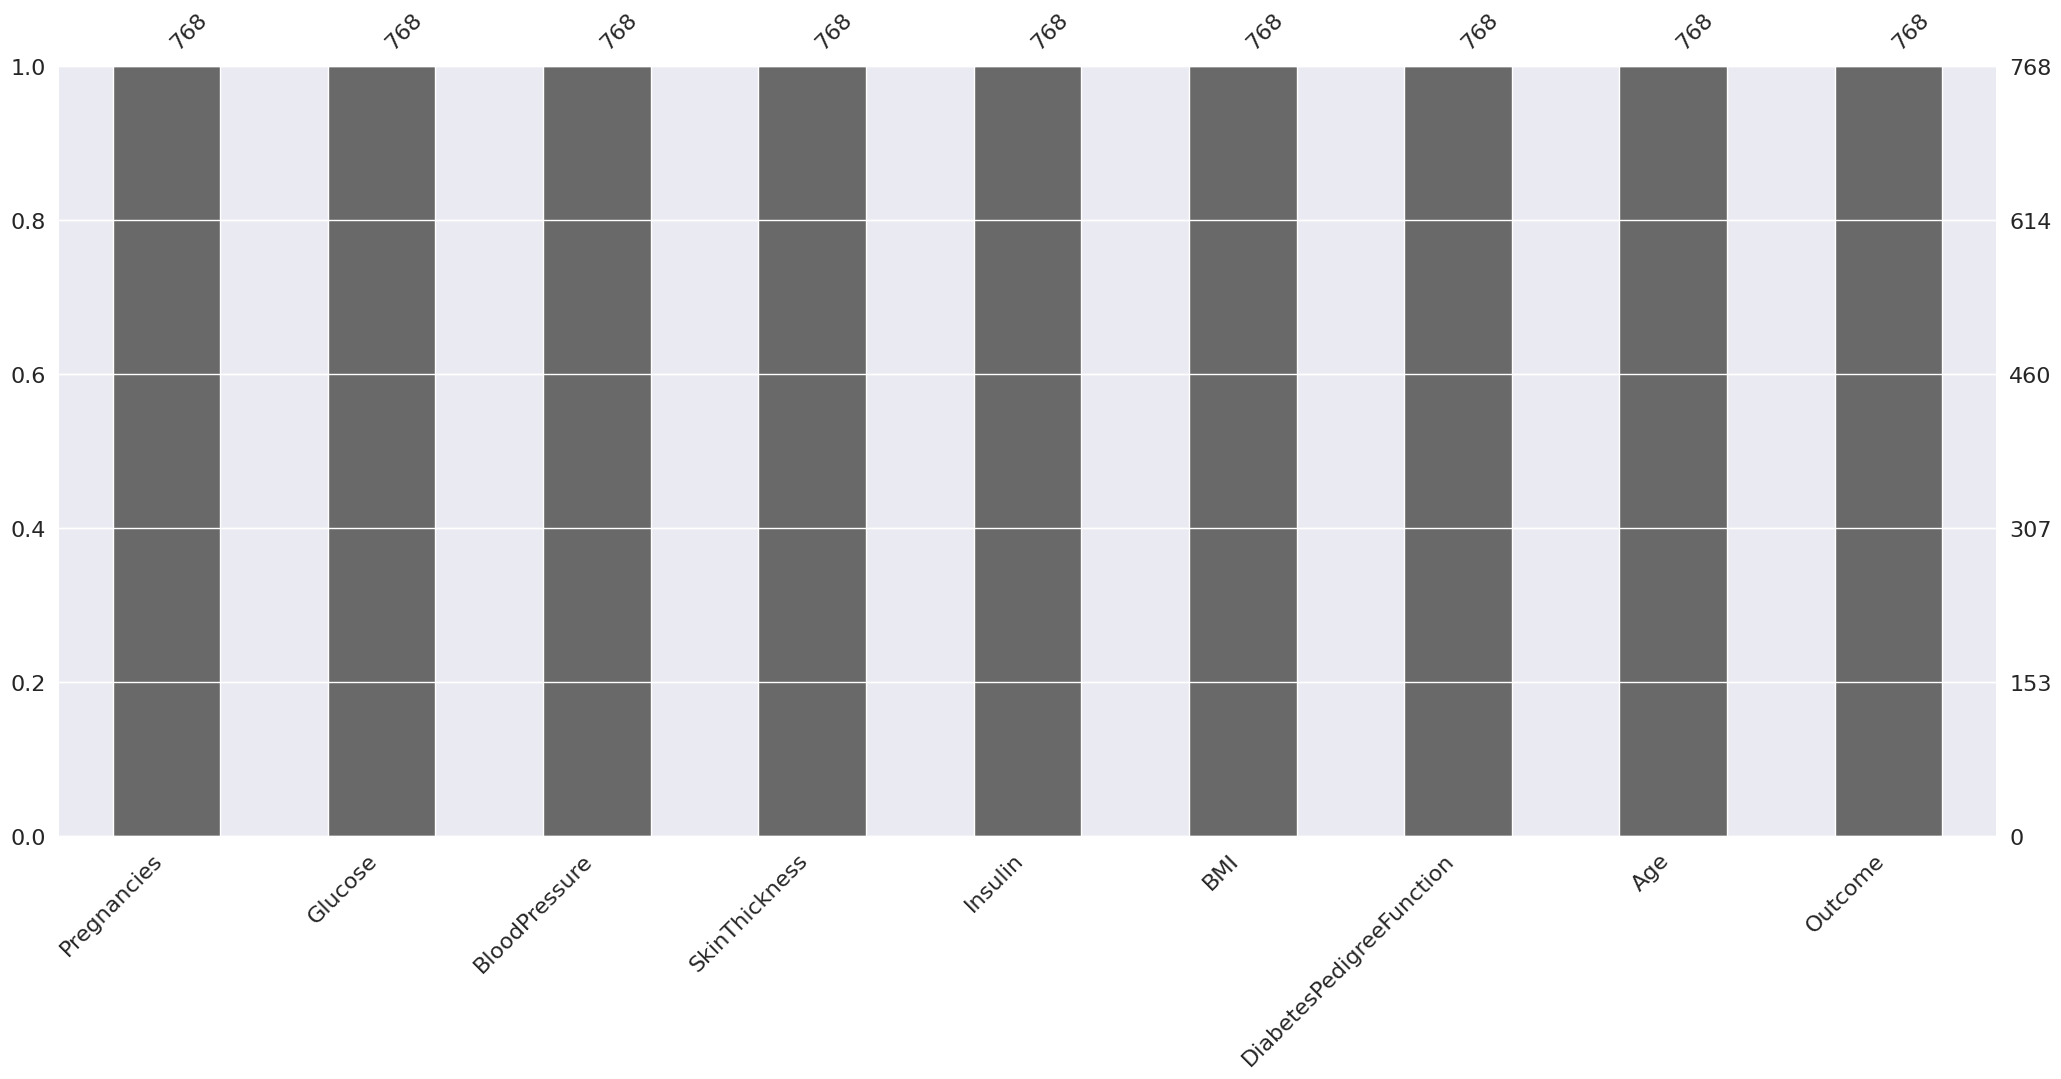

In [7]:
#Plotting Null Count

p = msno.bar(df)

# Exploratory Data Analysis

In [8]:
#Dataset Shape
df.shape

(768, 9)

In [9]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
#Descriptive Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='BMI', ylabel='Count'>

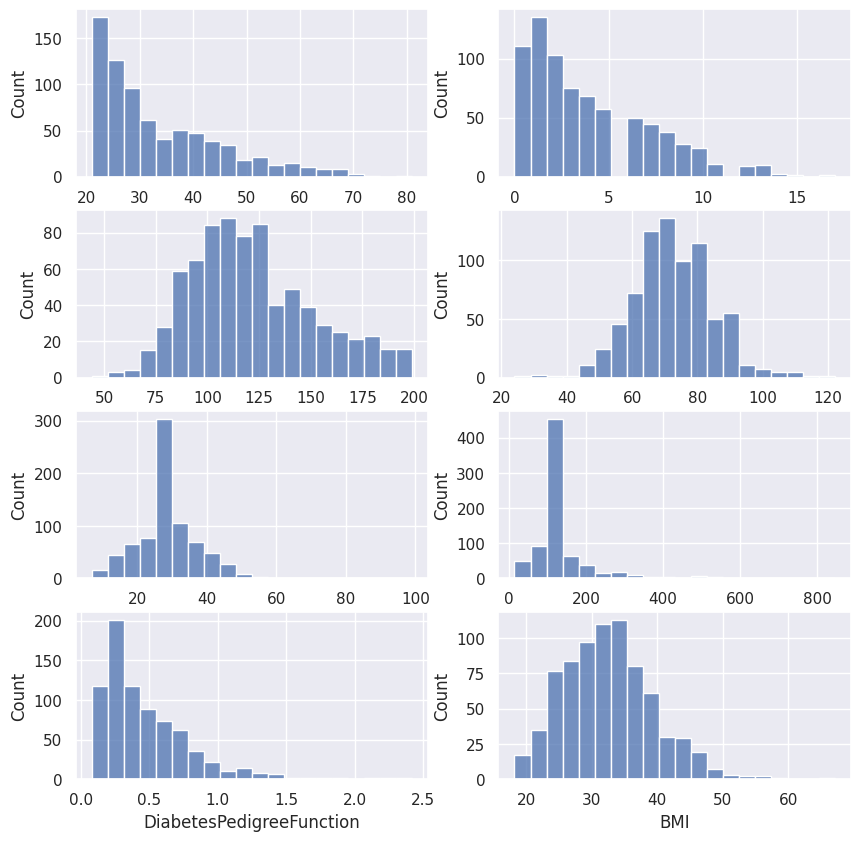

In [11]:
#Histogram of all variables
fig, ax = plt.subplots(4,2, figsize=(10,10))
sns.histplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.histplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.histplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.histplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.histplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.histplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [12]:
#Outcome Distribution
df['Outcome'].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

0    500
1    268
Name: Outcome, dtype: int64


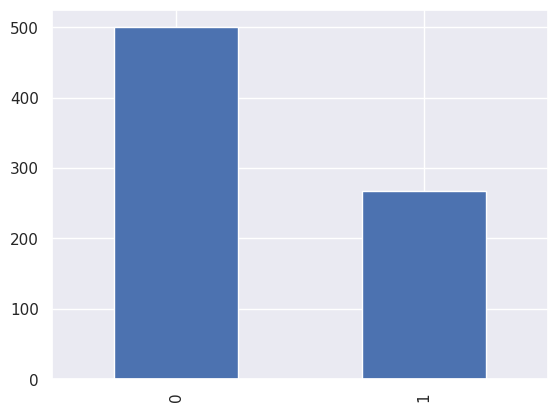

In [13]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p = df.Outcome.value_counts().plot(kind="bar")

Dataset Imbalance, diabetic patients are half of non-diabetic patients

In [14]:
#Correlation of The Dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


Correlation value > 0, positive correlation

Correlation value = 0, no correlation

Correlation value < 0, negative correlation

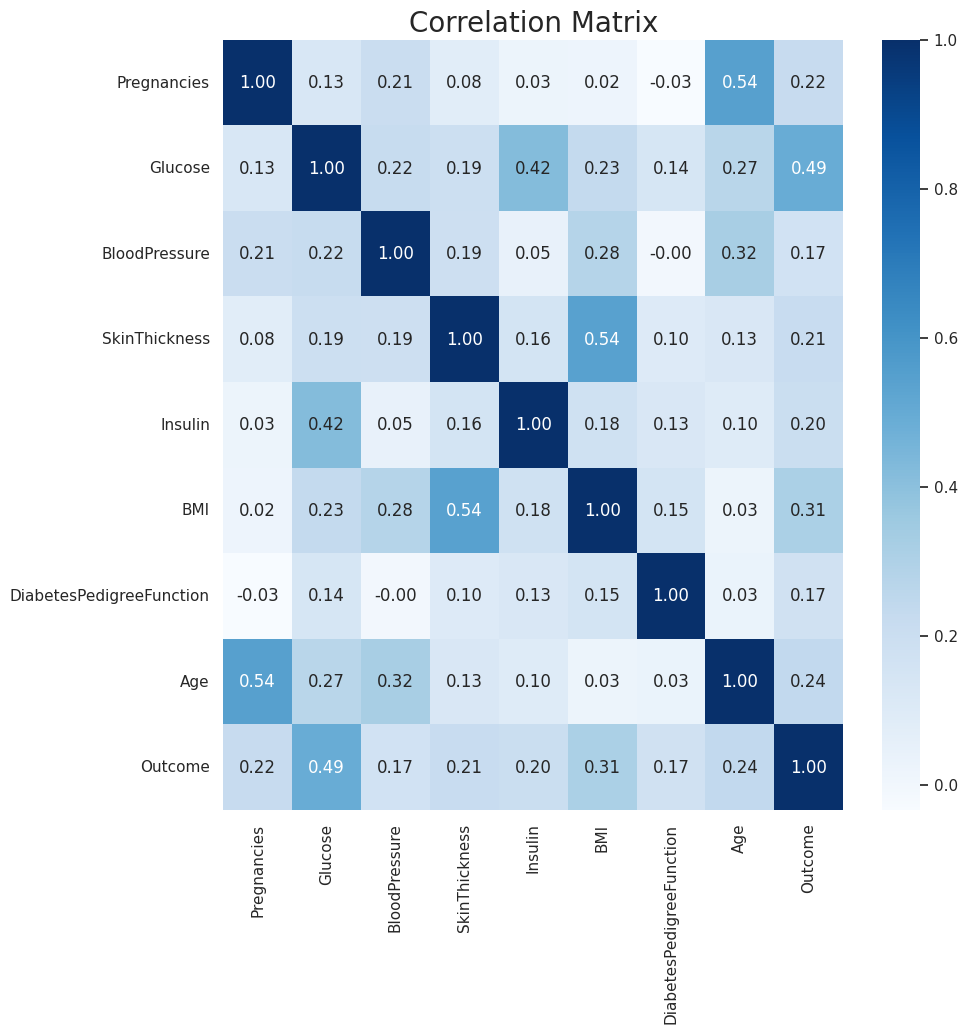

In [15]:
#Correlation Matrix Graphic
f, ax = plt.subplots(figsize= [10,10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Blues" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

#Feature Engineering

In [16]:
#Diabetes Status Based On Outcome Value
df.loc[df['Outcome'] == 1, 'Status_Diabetes'] = 'Positif'
df.loc[df['Outcome'] == 0, 'Status_Diabetes'] = 'Negatif'

#Bloodpressure Status Based on Bloodpressure Values
df.loc[df['BloodPressure'] < 59, 'Status_Bloodpressure'] = 'Low'
df.loc[df['BloodPressure'] > 60, 'Status_Bloodpressure'] = 'Normal'
df.loc[df['BloodPressure'] > 80, 'Status_Bloodpressure'] = 'High'

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status_Diabetes,Status_Bloodpressure
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Positif,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Negatif,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Positif,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Negatif,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Positif,Low


In [17]:
Status2 = df.groupby(['Status_Diabetes','Status_Bloodpressure']).agg({'Status_Bloodpressure' : 'count', 'Status_Diabetes' : 'count'})
Status2

Status_Bloodpressure  Status_Diabetes
Status_Diabetes Status_Bloodpressure                                       
Negatif         High                                    88               88
                Low                                     70               70
                Normal                                 312              312
Positif         High                                    77               77
                Low                                     16               16
                Normal                                 168              168

#One Hot Encoding

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status_Diabetes,Status_Bloodpressure
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Positif,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Negatif,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Positif,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Negatif,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Positif,Low


In [19]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(['Outcome','Status_Diabetes','Status_Bloodpressure'],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [20]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#Base Model

In [21]:
del df['Status_Diabetes']
del df['Status_Bloodpressure']

In [22]:
#Splitting The Dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#Split Dataset to 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=25)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
118,4,97.0,60.0,23.0,125.0,28.2,0.443,22
336,0,117.0,72.0,29.0,125.0,33.8,0.932,44
374,2,122.0,52.0,43.0,158.0,36.2,0.816,28
518,13,76.0,60.0,29.0,125.0,32.8,0.180,41
716,3,173.0,78.0,39.0,185.0,33.8,0.970,31
...,...,...,...,...,...,...,...,...
317,3,182.0,74.0,29.0,125.0,30.5,0.345,29
143,10,108.0,66.0,29.0,125.0,32.4,0.272,42
474,4,114.0,64.0,29.0,125.0,28.9,0.126,24
318,3,115.0,66.0,39.0,140.0,38.1,0.150,28


In [23]:
y_train

118    0
336    0
374    0
518    0
716    1
      ..
317    1
143    1
474    0
318    0
132    1
Name: Outcome, Length: 614, dtype: int64

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [54]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       103
           1       0.76      0.61      0.67        51

    accuracy                           0.81       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [55]:
#Fit Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       103
           1       0.60      0.65      0.62        51

    accuracy                           0.74       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.75      0.74      0.74       154



In [57]:
#Accuracy Test

predictions = rf.predict(X_test)
print("Random Forest Accuracy Score =", format(metrics.accuracy_score(y_test, predictions)))

predictions = dt.predict(X_test)
print("Decision Tree Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))


Random Forest Accuracy Score = 0.8051948051948052
Decision Tree Accuracy Score = 0.7402597402597403


The accuracy of Random Forest is higher than Decision Tree

#Tuning Model

##Resampling Imbalance Dataset

In [28]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_smote, y_smote = oversampling.fit_resample(X_train, y_train)

In [29]:
y_train.value_counts()

0    397
1    217
Name: Outcome, dtype: int64

In [30]:
y_smote.value_counts()

0    397
1    397
Name: Outcome, dtype: int64

In [65]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       103
           1       0.73      0.73      0.73        51

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



In [67]:
#Fit Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_smote, y_smote)

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       103
           1       0.56      0.76      0.64        51

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.72      0.73       154



##Hyper Parameter Tuning

In [32]:
rf.feature_importances_

array([0.08075255, 0.2690689 , 0.08428544, 0.06922442, 0.09052347,
       0.1554701 , 0.11656223, 0.13411288])

<Axes: >

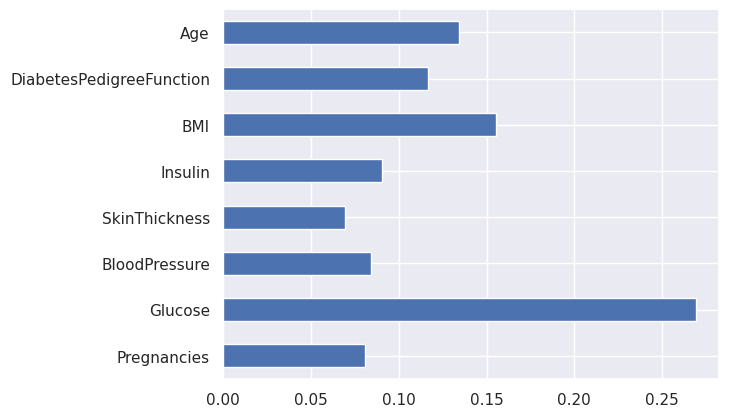

In [33]:
#Plotting feature importances
(pd.Series(rf.feature_importances_, index=X.columns)
   .plot(kind='barh'))

In [34]:
#Hyper Parameter Tuning Random Forest
modelrf=RandomForestClassifier(n_estimators=500,criterion='gini',
                             max_features=7,min_samples_leaf=5,random_state=25).fit(X_smote,y_smote)
predictions=model.predict(X_smote)
print(confusion_matrix(y_smote,predictions))
print(accuracy_score(y_smote,predictions))
print(classification_report(y_smote,predictions))

[[359  38]
 [ 27 370]]
0.9181360201511335
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       397
           1       0.91      0.93      0.92       397

    accuracy                           0.92       794
   macro avg       0.92      0.92      0.92       794
weighted avg       0.92      0.92      0.92       794



In [74]:
#Hyper Parameter Tuning Decision Tree
modeldt=DecisionTreeClassifier(criterion='gini',
                             max_features=7,min_samples_leaf=5,random_state=25).fit(X_smote,y_smote)
predictions=modeldt.predict(X_smote)
print(confusion_matrix(y_smote,predictions))
print(accuracy_score(y_smote,predictions))
print(classification_report(y_smote,predictions))

[[364  33]
 [ 43 354]]
0.9042821158690176
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       397
           1       0.91      0.89      0.90       397

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



After hyper parameter tuning, random forest accuracy is still higher than decision tree.

#Conclusion

The model used to predict whether someone will have diabetes or not this time is the Random Forest model.

The data is Imbalanced, that is, the number of diabetic and non-diabetic patients is not the same, so that when building the model, the accuracy obtained is low.

SMOTE and Hyperparameter Tuning are performed to correct the Imbalanced Dataset. Once this was done, the accuracy increased to 92%.

The variables that have the most influence on diabetes are glucose (blood sugar), BMI (Bassal Mass Index), and also age.